<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_11_Pandas Explode.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/main/README.md
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/main/README.md
Retrying in 2s [Retry 2/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/main/README.md
Retrying in 4s [Retry 3/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/main/README.md
Retrying in 8s [Retry 4/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/main/README.md
Retrying in 8s [Retry 5/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/main/README.md
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/ed776e5a0a8c40ea9d5ef

## 🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1)

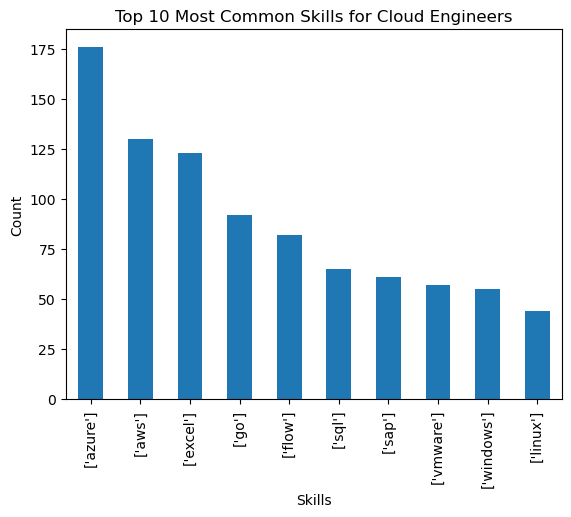

In [13]:
import ast

df_exploded = df[df['job_title_short'] == 'Cloud Engineer'].explode('job_skills').value_counts('job_skills').head(10)

df_exploded.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')

plt.show()



---

## 🟨 Average Salary by Skill (2.11.2)

In [15]:
import pandas as pd
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_exploded = df.explode('job_skills')
skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg = skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head()

skill_salary_avg


,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


---

## 🟥 Unique Skills Count (2.11.3)

In [16]:
df_exploded = df.explode('job_skills')

# Group by 'job_title_short' and count unique skills
unique_skills_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


---